In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./data/ecommerce.csv")
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [13]:
outlier = data.describe()

In [14]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Axes: >

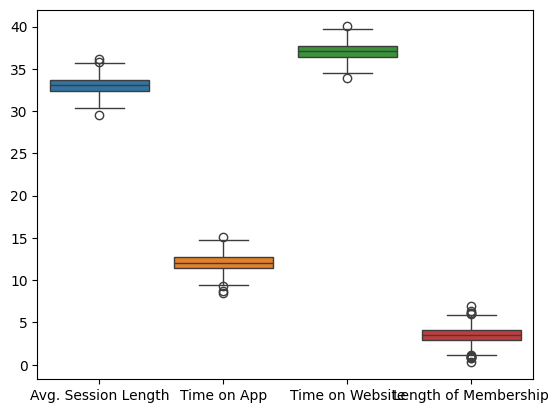

In [7]:
sns.boxplot(data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']])

In [15]:
outlier

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [25]:
outlier = pd.concat([outlier, pd.DataFrame(outlier.loc['75%'] + (1.5 * (outlier.loc['75%'] - outlier.loc['25%'])), columns=["정상최대값"]).T], )

In [24]:
outlier = pd.concat([outlier, pd.DataFrame(outlier.loc['25%'] - (1.5 * (outlier.loc['75%'] - outlier.loc['25%'])), columns=['정상최소값']).T])

In [26]:
outlier

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462
정상최소값,30.286577,9.339609,34.298495,1.136371,288.624951
정상최대값,35.767230,14.802394,39.767195,5.920580,705.727153


In [27]:
data['Address'].nunique()

500

In [28]:
data['Address'].head()

0         835 Frank Tunnel\nWrightmouth, MI 82180-9605
1       4547 Archer Common\nDiazchester, CA 06566-8576
2    24645 Valerie Unions Suite 582\nCobbborough, D...
3     1414 David Throughway\nPort Jason, OH 22070-1220
4    14023 Rodriguez Passage\nPort Jacobville, PR 3...
Name: Address, dtype: object

In [165]:
for i in data['Address'].str.split(","):
    print(i[-1].split()[-2])

MI
CA
DC
OH
PR
MN
WV
AP
SD
AA
WY
AA
MO
MP
ND
OH
GA
PW
PW
MT
KY
AE
AA
AA
WV
ND
VI
TX
MS
SC
WA
DC
AA
NJ
MS
NH
PW
MI
ME
ID
TN
AK
KY
DE
AE
FM
HI
KS
NC
TN
UT
MS
CA
AL
AA
LA
NE
OR
SD
AA
MN
CT
WA
MA
DE
IN
MS
AZ
AE
MH
NC
AP
HI
NY
MH
CO
CO
AE
IN
IA
GU
IN
IA
AP
NC
WV
TX
AK
VI
AL
AS
AE
RI
SD
VA
NC
DE
AE
AP
MD
FM
WV
OK
WI
VT
FL
IL
MH
MO
MP
NV
TX
PA
NC
AL
MS
ME
MP
ND
AA
VA
DC
OH
KY
IL
KY
SC
AS
AE
AS
WI
OH
NJ
CO
OR
AP
MT
NM
DE
VT
SC
SC
IN
OR
DC
HI
MA
PA
MI
CO
NM
DE
MH
SC
UT
WY
MP
AP
VI
NJ
AE
VI
PA
AA
AP
MH
ND
PA
MT
MO
SD
KY
WI
NV
PR
PA
OR
DE
TX
AK
AR
OR
FL
ME
NC
VT
CA
PR
FL
RI
NJ
IN
RI
NC
SD
SC
NH
VT
PR
WY
FM
WA
WI
WV
AK
NY
AE
AL
PW
MI
LA
FM
SD
AR
NH
VT
IL
HI
KS
ND
DC
RI
IL
MN
VA
AE
GA
PW
OK
NJ
MD
SC
OR
NM
AL
HI
MI
DE
AE
NE
PW
GU
AZ
FM
AR
ID
MI
VA
WY
AA
IA
LA
VT
NV
WV
AA
VA
OR
KS
NY
RI
KS
WV
FL
NY
AR
MT
RI
WY
KY
FM
AZ
LA
NM
NH
VT
AS
MN
MO
RI
MD
IN
PA
TX
MT
OR
OK
NV
AP
AP
AZ
MS
SC
TX
ND
CO
SC
AL
MS
NE
OK
AE
AP
PR
FL
IN
GU
MN
MA
IA
AE
GA
OK
WI
IL
MS
AL
WY
PR
MN
LA
NV
PA
AL
GA
HI
SC
DC
NC
NY
VT
WY
MD
N

In [29]:
data['Address'].str.split(",")

0        [835 Frank Tunnel\nWrightmouth,  MI 82180-9605]
1      [4547 Archer Common\nDiazchester,  CA 06566-8576]
2      [24645 Valerie Unions Suite 582\nCobbborough, ...
3      [1414 David Throughway\nPort Jason,  OH 22070-...
4      [14023 Rodriguez Passage\nPort Jacobville,  PR...
                             ...                        
495    [4483 Jones Motorway Suite 872\nLake Jamiefurt...
496    [172 Owen Divide Suite 497\nWest Richard,  CA ...
497    [0787 Andrews Ranch Apt. 633\nSouth Chadburgh,...
498    [680 Jennifer Lodge Apt. 808\nBrendachester,  ...
499    [49791 Rachel Heights Apt. 898\nEast Drewborou...
Name: Address, Length: 500, dtype: object

In [30]:
data['Address'].str.split(",").apply(lambda x: x[-1].split()[-2])

0      MI
1      CA
2      DC
3      OH
4      PR
       ..
495    UT
496    CA
497    TN
498    TX
499    OR
Name: Address, Length: 500, dtype: object

In [31]:
data['state_name'] = data['Address'].str.split(",").apply(lambda x: x[-1].split()[-2])

In [32]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,state_name
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR


In [33]:
data['Avatar'].nunique()

138

In [34]:
sorted(data.groupby('Avatar')['Yearly Amount Spent'].mean())

[386.6479469644702,
 406.72210505413426,
 419.63294156751954,
 420.4525495603057,
 425.7450920310528,
 426.2491997948072,
 430.6901723817928,
 432.5880745084584,
 434.0216997527185,
 435.50696136042393,
 435.53438736846255,
 436.7205558562188,
 436.93721042160973,
 437.98836007828095,
 441.0606890984435,
 444.79794926582264,
 449.6439355046467,
 450.8085408678162,
 452.62725499508304,
 457.3757575535788,
 457.84769594494855,
 458.1109670290833,
 459.73175574914313,
 460.6932386153623,
 464.4492715811856,
 464.64799776409825,
 465.219163427335,
 465.94376701872335,
 467.9852374676245,
 469.89882388155974,
 471.9477147236624,
 472.1404800783187,
 473.33094790940635,
 473.62637580373496,
 474.3145305571195,
 475.2178389767011,
 475.759067788328,
 476.3801445434332,
 476.7667241547634,
 476.989533966875,
 477.9051175131702,
 478.33616628747586,
 480.6720732687792,
 481.0113949279279,
 481.3977129840615,
 482.5055820949065,
 483.3034620257754,
 483.40727367591916,
 483.5028225299293,
 483.5

In [35]:
data.groupby('state_name')['Yearly Amount Spent'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
PW,6.0,413.315738,41.089085,347.776927,400.548738,409.858739,442.239989,461.920877
GU,6.0,414.701360,100.849577,304.135592,342.417144,397.705547,469.328461,571.471034
NH,7.0,448.609303,68.641665,352.550108,402.141196,461.790959,499.879045,521.883573
NV,6.0,452.483974,84.186395,298.762008,439.175327,468.934705,497.186987,542.412477
LA,6.0,461.629503,77.256200,368.654785,406.529416,464.109429,493.333888,582.491924
...,...,...,...,...,...,...,...,...
MN,11.0,546.266279,81.288184,401.033135,485.806863,583.977802,610.497563,637.102448
AR,6.0,550.633210,28.390539,517.165136,527.858082,553.068623,565.213072,591.781089
IN,7.0,558.303399,122.284826,462.897636,470.345119,488.786061,625.115698,765.518462


In [36]:
data.groupby('state_name')['Yearly Amount Spent'].describe().sort_values(by='min')

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
AE,18.0,482.601682,92.842442,256.670582,420.285739,474.498979,547.405206,614.715334
PR,7.0,503.804542,112.601221,266.086341,499.286589,537.215053,562.675565,599.406092
NC,10.0,486.433245,99.478551,275.918421,428.061720,506.623442,545.294161,618.845970
NE,6.0,514.528367,129.523960,282.471246,495.434989,529.836864,580.399596,663.803693
NV,6.0,452.483974,84.186395,298.762008,439.175327,468.934705,497.186987,542.412477
...,...,...,...,...,...,...,...,...
OH,5.0,537.757418,49.818879,461.780742,514.239521,557.608262,573.306222,581.852344
IN,7.0,558.303399,122.284826,462.897636,470.345119,488.786061,625.115698,765.518462
MT,8.0,532.454993,45.631615,463.591418,501.423151,541.616592,556.876805,605.061039


In [37]:
data.groupby('state_name')['Yearly Amount Spent'].describe().sort_values(by='max')

,count,mean,std,min,25%,50%,75%,max
state_name,,,,,,,,
PW,6.0,413.315738,41.089085,347.776927,400.548738,409.858739,442.239989,461.920877
NH,7.0,448.609303,68.641665,352.550108,402.141196,461.790959,499.879045,521.883573
WY,7.0,475.637737,41.280511,404.824529,457.921163,479.172851,498.292196,533.040060
ID,3.0,463.830937,66.512082,409.070472,426.823308,444.576144,491.211170,537.846195
NV,6.0,452.483974,84.186395,298.762008,439.175327,468.934705,497.186987,542.412477
...,...,...,...,...,...,...,...,...
VT,12.0,512.502240,98.228516,410.069611,439.143595,473.775704,571.978885,708.935185
NY,8.0,518.919349,123.805703,375.398455,431.507935,489.919687,619.078125,712.396327
UT,5.0,566.491138,119.244259,392.810345,544.409272,573.847438,595.803819,725.584814


선형성, 독립성, 등분산성, 정규성

In [38]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'state_name'],
      dtype='object')

In [39]:
data.corr(numeric_only=True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

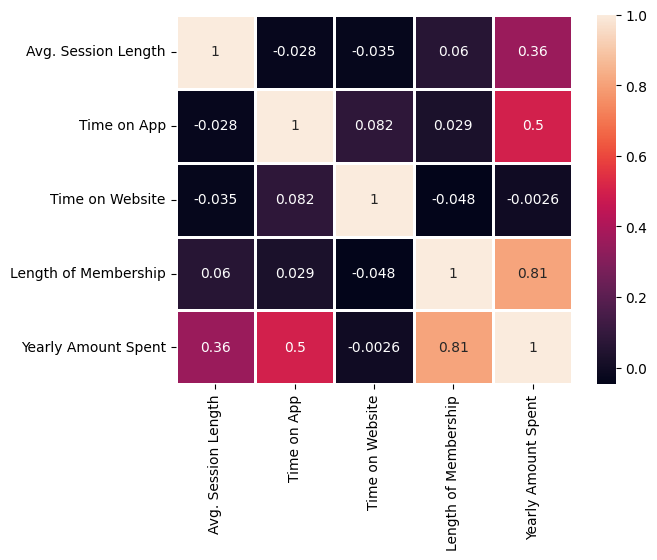

In [176]:
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidth=1)

In [40]:
data = data.drop(['Email', 'Address', 'Avatar'], axis=1)
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,state_name
0,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,PR


In [41]:
data.columns = [col.replace(" ", "").replace(".", "") for col in data.columns]
data.head()

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent,state_name
0,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,PR


In [42]:
X = data.drop('YearlyAmountSpent', axis=1)
y = data['YearlyAmountSpent']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

다중선형회귀분석하기

In [45]:
# statsmodels R 문법
from statsmodels.formula.api import ols
# import statsmodels.api as sm
# sm.OLS

In [46]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.head()

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name,YearlyAmountSpent
342,32.342796,11.409645,35.777782,3.872432,MT,486.083426
359,32.054262,13.149670,37.650400,4.195614,ME,561.874658
109,33.356874,13.452129,38.503009,3.318822,MP,549.008227
50,33.256335,13.858062,37.780265,5.976768,UT,725.584814
452,33.552108,11.120871,36.808376,4.027814,ME,521.195311


In [47]:
train_data.columns

Index(['AvgSessionLength', 'TimeonApp', 'TimeonWebsite', 'LengthofMembership',
       'state_name', 'YearlyAmountSpent'],
      dtype='object')

In [48]:
lm = ols('YearlyAmountSpent ~ AvgSessionLength + TimeonApp + TimeonWebsite + LengthofMembership + C(state_name)', data=train_data).fit()

In [49]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     389.1
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          4.36e-279
Time:                        09:29:38   Log-Likelihood:                -1449.5
No. Observations:                 400   AIC:                             3031.
Df Residuals:                     334   BIC:                             3294.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -1044.0261     27.310    -38.228      0.000   -1097.748    -990.304
C(state_name)[T.AE]    -0.2681      3.692     -0.073      0.942      -7.531       6.995
C(state_name)[T.AK]     0.6355      5.219      0.122      0.903      -9.631      10.902
C(state_name)[T.AL]    -1.4055      4.423     -0.318      0.751     -10.106       7.295
C(state_name)[T.AP]    -2.0814      4.127     -0.504      0.614     -10.200       6.037
C(state_name)[T.AR]    11.2649      5.701      1.976      0.049       0.050      22.480
C(state_name)[T.AS]    -2.9825      4.620     -0.646      0.519     -12.070       6.105
C(state_name)[T.AZ]    -3.4977      4.606     -0.759      0.448     -12.558       5.563
C(state_name)[T.CA]     3.2973      5.208      0.633      0.527      -6.948      13.543
C(state_name)[T.CO]     4.3226      5.638      0.767      0.444      -6.768      15.413
C(state_name)[T.CT]    -1.8944      5.675     -0.334      0.739     -13.058       9.269
C(state_name)[T.DC]    -7.1931      5.631     -1.277      0.202     -18.270       3.883
C(state_name)[T.DE]    -2.2724      4.125     -0.551      0.582     -10.388       5.843
C(state_name)[T.FL]    -1.0106      4.409     -0.229      0.819      -9.683       7.662
C(state_name)[T.FM]     1.5194      4.858      0.313      0.755      -8.037      11.076
C(state_name)[T.GA]     6.3291      4.620      1.370      0.172      -2.759      15.417
C(state_name)[T.GU]    -1.2212      5.663     -0.216      0.829     -12.361       9.919
C(state_name)[T.HI]    -3.0376      4.846     -0.627      0.531     -12.571       6.496
C(state_name)[T.IA]     5.8753      4.876      1.205      0.229      -3.717      15.467
C(state_name)[T.ID]    -7.0579     10.301     -0.685      0.494     -27.322      13.206
C(state_name)[T.IL]     2.5970      4.850      0.535      0.593      -6.943      12.137
C(state_name)[T.IN]     1.6246      4.883      0.333      0.740      -7.980      11.229
C(state_name)[T.KS]     3.4717      4.408      0.788      0.432      -5.200      12.143
C(state_name)[T.KY]    -1.9248      4.405     -0.437      0.662     -10.590       6.741
C(state_name)[T.LA]     0.3371      4.863      0.069      0.945      -9.229       9.903
C(state_name)[T.MA]     0.3770      5.188      0.073      0.942      -9.829      10.583
C(state_name)[T.MD]     7.5277      5.182      1.453      0.147      -2.666      17.721
C(state_name)[T.ME]     3.6069      4.625      0.780      0.436      -5.490      12.704
C(state_name)[T.MH]    -0.7961      4.876     -0.163      0.870     -10.387       8.795
C(state_name)[T.MI]     9.6009      4.401      2.181      0.030       0.943      18.258
C(state_name)[T.MN]     0.8870      4.911      0.181      0.857      -8.773      10.547
C(state_name)[T.MO]     5.8362      4.023      1.451      0.148      -2.077      13.750
C(s

In [62]:
train_data = train_data.drop('state_name', axis=1)
train_data

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent
342,32.342796,11.409645,35.777782,3.872432,486.083426
359,32.054262,13.149670,37.650400,4.195614,561.874658
109,33.356874,13.452129,38.503009,3.318822,549.008227
50,33.256335,13.858062,37.780265,5.976768,725.584814
452,33.552108,11.120871,36.808376,4.027814,521.195311
...,...,...,...,...,...
211,34.081646,12.104542,36.059646,3.974522,548.518529
67,32.805220,11.835476,36.375066,3.439591,469.310861
25,33.029332,11.765813,37.738525,2.721736,423.179992
196,32.733224,11.818572,37.102031,1.503854,352.550108


In [64]:
X_test = X_test.drop('state_name', axis=1)
X_test

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership
308,32.644617,12.637557,36.517086,5.226688
13,33.190334,12.959226,36.144667,3.918542
414,32.381035,12.433129,37.626907,4.334001
32,32.175501,13.387492,35.694175,4.343063
460,34.034164,13.592513,36.838657,3.605934
...,...,...,...,...
235,33.177205,11.622777,35.968896,3.634094
26,33.541231,12.783892,36.430650,4.648199
168,33.644177,13.160020,36.407747,3.015175
451,33.943119,11.484199,36.839366,2.402454


In [73]:
'YearlyAmountSpent ~ ' + "+".join(train_data.columns[:-1])

'YearlyAmountSpent ~ AvgSessionLength+TimeonApp+TimeonWebsite+LengthofMembership'

In [76]:
lm = ols('YearlyAmountSpent ~ ' + "+".join(train_data.columns[:-1]), data=train_data).fit()

In [77]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     6386.
Date:                Fri, 30 Aug 2024   Prob (F-statistic):               0.00
Time:                        10:11:41   Log-Likelihood:                -1480.6
No. Observations:                 400   AIC:                             2971.
Df Residuals:                     395   BIC:                             2991.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1050.6189     25.293    -41.537      0.000   -1100.345   -1000.893
AvgSessionLength      25.3992      0.494     51.416      0.000      24.428      26.370
TimeonApp             38.3882      0.501     76.680      0.000      37.404      39.372
TimeonWebsite          0.7940      0.492      1.615      0.107      -0.172       1.761
LengthofMembership    61.8120      0.488    126.571      0.000      60.852      62.772
==============================================================================
Omnibus:                        0.085   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.150
Skew:                          -0.031   Prob(JB):                        0.928
Kurtosis:                       2.929   Cond. No.                     2.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [78]:
pred = lm.predict(X_test)

In [79]:
pred

308    615.727600
13     560.781889
414    546.887707
32     577.329113
460    587.753328
          ...    
235    491.422685
26     608.292258
168    524.387279
451    430.117582
238    422.161867
Length: 100, dtype: float64

In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
print("Mean_Squared_Error(MSE): ", mean_squared_error(y_test, pred))
print("Root_Mean_Squared_Error(RMSE): ", np.sqrt(mean_squared_error(y_test, pred)))

Mean_Squared_Error(MSE):  109.95129385219393
Root_Mean_Squared_Error(RMSE):  10.485766250121825


In [82]:
# p-value 가져오기
p_value = lm.pvalues[1]

C:\Users\5-29\AppData\Local\Temp\ipykernel_14140\1775521374.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = lm.pvalues[1]


In [60]:
lm.pvalues

Intercept             3.237276e-146
AvgSessionLength      4.308986e-177
TimeonApp             2.621407e-239
TimeonWebsite          1.070847e-01
LengthofMembership    8.497929e-322
dtype: float64

In [59]:
p_value

4.308986074285119e-177

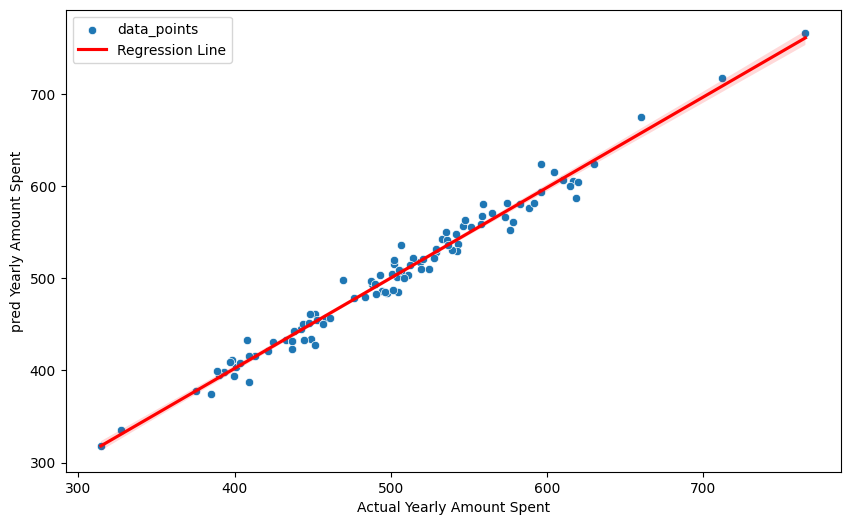

In [192]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=pred, label='data_points')
sns.regplot(x=y_test, y=pred, scatter=False, label="Regression Line", color='red')
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("pred Yearly Amount Spent")
plt.legend()
plt.show()

In [83]:
X

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name
0,34.497268,12.655651,39.577668,4.082621,MI
1,31.926272,11.109461,37.268959,2.664034,CA
2,33.000915,11.330278,37.110597,4.104543,DC
3,34.305557,13.717514,36.721283,3.120179,OH
4,33.330673,12.795189,37.536653,4.446308,PR
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,UT
496,34.702529,11.695736,37.190268,3.576526,CA
497,32.646777,11.499409,38.332576,4.958264,TN
498,33.322501,12.391423,36.840086,2.336485,TX


In [84]:
X = pd.get_dummies(X, drop_first=True)
X

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name_AE,state_name_AK,state_name_AL,state_name_AP,state_name_AR,state_name_AS,...,state_name_TN,state_name_TX,state_name_UT,state_name_VA,state_name_VI,state_name_VT,state_name_WA,state_name_WI,state_name_WV,state_name_WY
0,34.497268,12.655651,39.577668,4.082621,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,31.926272,11.109461,37.268959,2.664034,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,33.000915,11.330278,37.110597,4.104543,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,34.305557,13.717514,36.721283,3.120179,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,33.330673,12.795189,37.536653,4.446308,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
496,34.702529,11.695736,37.190268,3.576526,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
497,32.646777,11.499409,38.332576,4.958264,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
498,33.322501,12.391423,36.840086,2.336485,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [85]:
from sklearn.preprocessing import MinMaxScaler

In [86]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name_AE,state_name_AK,state_name_AL,state_name_AP,state_name_AR,state_name_AS,...,state_name_TN,state_name_TX,state_name_UT,state_name_VA,state_name_VI,state_name_VT,state_name_WA,state_name_WI,state_name_WV,state_name_WY
0,0.751425,0.626620,0.929816,0.573101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.362306,0.393016,0.550801,0.359869,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.524953,0.426378,0.524803,0.576396,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.722409,0.787050,0.460890,0.428434,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.574861,0.647702,0.594748,0.627768,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.560784,0.764183,0.411098,0.522589,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.782491,0.481592,0.537882,0.497028,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.471354,0.451931,0.725412,0.704722,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.573625,0.586699,0.480394,0.310634,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# statsmodels의 python문법
import statsmodels.api as sm

In [88]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled, y, test_size=0.2, random_state=7)

In [89]:
X2_train

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name_AE,state_name_AK,state_name_AL,state_name_AP,state_name_AR,state_name_AS,...,state_name_TN,state_name_TX,state_name_UT,state_name_VA,state_name_VI,state_name_VT,state_name_WA,state_name_WI,state_name_WV,state_name_WY
342,0.425347,0.438369,0.305998,0.541507,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,0.381678,0.701258,0.613421,0.590085,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109,0.578827,0.746955,0.753392,0.458292,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.563611,0.808285,0.634741,0.857816,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
452,0.608376,0.394740,0.475188,0.564863,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,0.688521,0.543356,0.352271,0.556852,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.495335,0.502705,0.404052,0.476445,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,0.529254,0.492180,0.627888,0.368542,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
196,0.484438,0.500151,0.523397,0.185479,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
# 상수항 추가 y절편 
X2_train = sm.add_constant(X2_train)
X2_test = sm.add_constant(X2_test)

In [102]:
X2_train.head(2)

,const,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name_AE,state_name_AK,state_name_AL,state_name_AP,state_name_AR,...,state_name_TN,state_name_TX,state_name_UT,state_name_VA,state_name_VI,state_name_VT,state_name_WA,state_name_WI,state_name_WV,state_name_WY
342,1.0,0.425347,0.438369,0.305998,0.541507,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
359,1.0,0.381678,0.701258,0.613421,0.590085,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X2_train.shape

(400, 66)

In [104]:
X2_test.shape

(100, 66)

In [105]:
lr = sm.OLS(y2_train, X2_train).fit()

In [106]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     389.1
Date:                Fri, 30 Aug 2024   Prob (F-statistic):          4.36e-279
Time:                        10:18:18   Log-Likelihood:                -1449.5
No. Observations:                 400   AIC:                             3031.
Df Residuals:                     334   BIC:                             3294.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 68.9556      4.422     15.593      0.000      60.257      77.654
AvgSessionLength     167.9026      3.577     46.946      0.000     160.867     174.938
TimeonApp            254.9057      3.578     71.238      0.000     247.867     261.944
TimeonWebsite          3.2623      3.232      1.009      0.314      -3.095       9.620
LengthofMembership   411.0312      3.604    114.036      0.000     403.941     418.121
state_name_AE         -0.2681      3.692     -0.073      0.942      -7.531       6.995
state_name_AK          0.6355      5.219      0.122      0.903      -9.631      10.902
state_name_AL         -1.4055      4.423     -0.318      0.751     -10.106       7.295
state_name_AP         -2.0814      4.127     -0.504      0.614     -10.200       6.037
state_name_AR         11.2649      5.701      1.976      0.049       0.050      22.480
state_name_AS         -2.9825      4.620     -0.646      0.519     -12.070       6.105
state_name_AZ         -3.4977      4.606     -0.759      0.448     -12.558       5.563
state_name_CA          3.2973      5.208      0.633      0.527      -6.948      13.543
state_name_CO          4.3226      5.638      0.767      0.444      -6.768      15.413
state_name_CT         -1.8944      5.675     -0.334      0.739     -13.058       9.269
state_name_DC         -7.1931      5.631     -1.277      0.202     -18.270       3.883
state_name_DE         -2.2724      4.125     -0.551      0.582     -10.388       5.843
state_name_FL         -1.0106      4.409     -0.229      0.819      -9.683       7.662
state_name_FM          1.5194      4.858      0.313      0.755      -8.037      11.076
state_name_GA          6.3291      4.620      1.370      0.172      -2.759      15.417
state_name_GU         -1.2212      5.663     -0.216      0.829     -12.361       9.919
state_name_HI         -3.0376      4.846     -0.627      0.531     -12.571       6.496
state_name_IA          5.8753      4.876      1.205      0.229      -3.717      15.467
state_name_ID         -7.0579     10.301     -0.685      0.494     -27.322      13.206
state_name_IL          2.5970      4.850      0.535      0.593      -6.943      12.137
state_name_IN          1.6246      4.883      0.333      0.740      -7.980      11.229
state_name_KS          3.4717      4.408      0.788      0.432      -5.200      12.143
state_name_KY         -1.9248      4.405     -0.437      0.662     -10.590       6.741
state_name_LA          0.3371      4.863      0.069      0.945      -9.229       9.903
state_name_MA          0.3770      5.188      0.073      0.942      -9.829      10.583
state_name_MD          7.5277      5.182      1.453      0.147      -2.666      17.721
state_name_ME          3.6069      4.625      0.780      0.436      -5.490      12.704
state_name_MH         -0.7961      4.8

In [107]:
pred2 = lr.predict(X2_test)

In [108]:
print("MSE:", mean_squared_error(y2_test, pred2))
print("RMSE:", np.sqrt(mean_squared_error(y2_test, pred2)))

MSE: 129.56166461472077
RMSE: 11.382515741905248


In [109]:
lr.pvalues

const                  1.434902e-41
AvgSessionLength      3.876553e-149
TimeonApp             4.908491e-204
TimeonWebsite          3.135282e-01
LengthofMembership    1.659490e-269
                          ...      
state_name_VT          4.344017e-01
state_name_WA          8.593378e-01
state_name_WI          8.630263e-01
state_name_WV          4.307624e-01
state_name_WY          8.274660e-01
Length: 66, dtype: float64

In [110]:
p_value2 = lr.pvalues[1]

C:\Users\5-29\AppData\Local\Temp\ipykernel_14140\3866051157.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value2 = lr.pvalues[1]


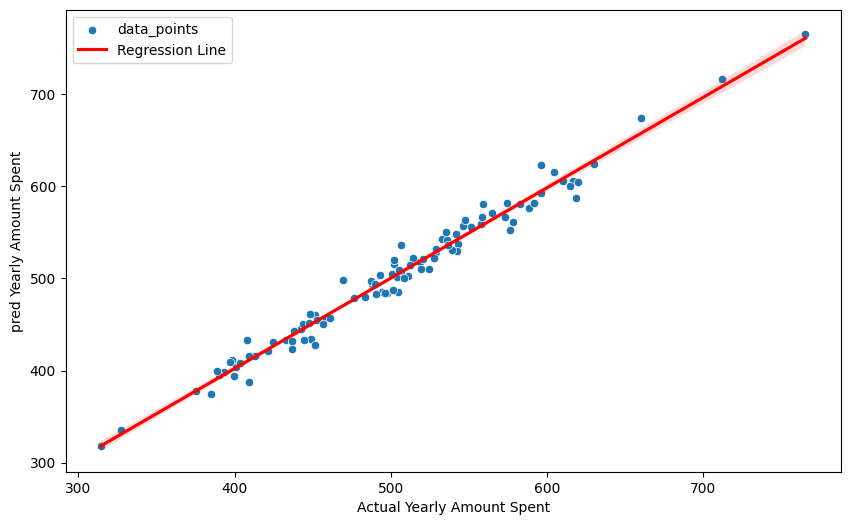

In [111]:
# 산점도와 회귀선 그리기
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y2_test, y=pred2, label='data_points')
sns.regplot(x=y2_test, y=pred2, scatter=False, label="Regression Line", color='red')
plt.xlabel("Actual Yearly Amount Spent")
plt.ylabel("pred Yearly Amount Spent")
plt.legend()
plt.show()

사이킷런으로 회귀분석

In [112]:
from sklearn.linear_model import LinearRegression

In [113]:
slr = LinearRegression()
slr.fit(X2_train, y2_train)
pred3 = slr.predict(X2_test)
print("MSE", mean_squared_error(y2_test, pred3))
print("RMSE", np.sqrt(mean_squared_error(y2_test, pred3)))

MSE 129.61888922971107
RMSE 11.385029171227936


In [114]:
print("y절편(intercept):", slr.intercept_)

y절편(intercept): 817165445661113.0


In [220]:
print("Rank:", slr.rank_)

Rank: 66


In [115]:
print("coef_", slr.coef_)

coef_ [-8.17165446e+14  1.67897537e+02  2.54906239e+02  3.25186226e+00
  4.11033943e+02 -2.68383126e-01  6.37429567e-01 -1.40340734e+00
 -2.08251576e+00  1.12724896e+01 -2.98056802e+00 -3.49847741e+00
  3.29536971e+00  4.32021365e+00 -1.89067436e+00 -7.19737426e+00
 -2.27223041e+00 -1.00971668e+00  1.51895901e+00  6.32981837e+00
 -1.21664606e+00 -3.03703801e+00  5.87161808e+00 -7.05905718e+00
  2.59823718e+00  1.62100221e+00  3.47181878e+00 -1.92801976e+00
  3.36983293e-01  3.76172878e-01  7.52442004e+00  3.60613634e+00
 -7.94664971e-01  9.60360631e+00  8.83063138e-01  5.83564008e+00
  6.47864724e+00  2.87195246e+00  1.22281593e+01  2.45131112e-01
  2.79168849e+00 -2.20454450e+00  6.64113523e-01 -1.30887915e+00
 -2.73392468e-01 -1.37293543e+00  2.87982958e+00  3.94997672e+00
  1.94626072e+00  6.61877543e+00 -2.59151843e+00 -7.47534925e-01
  7.99518731e-01 -6.35583537e+00 -3.29987973e-01  4.07904463e+00
  4.98409038e-01  6.53181717e+00 -3.34816441e+00  3.41338708e-01
 -2.58741021e+00  3

In [116]:
print("coef_", slr.feature_names_in_)

coef_ ['const' 'AvgSessionLength' 'TimeonApp' 'TimeonWebsite'
 'LengthofMembership' 'state_name_AE' 'state_name_AK' 'state_name_AL'
 'state_name_AP' 'state_name_AR' 'state_name_AS' 'state_name_AZ'
 'state_name_CA' 'state_name_CO' 'state_name_CT' 'state_name_DC'
 'state_name_DE' 'state_name_FL' 'state_name_FM' 'state_name_GA'
 'state_name_GU' 'state_name_HI' 'state_name_IA' 'state_name_ID'
 'state_name_IL' 'state_name_IN' 'state_name_KS' 'state_name_KY'
 'state_name_LA' 'state_name_MA' 'state_name_MD' 'state_name_ME'
 'state_name_MH' 'state_name_MI' 'state_name_MN' 'state_name_MO'
 'state_name_MP' 'state_name_MS' 'state_name_MT' 'state_name_NC'
 'state_name_ND' 'state_name_NE' 'state_name_NH' 'state_name_NJ'
 'state_name_NM' 'state_name_NV' 'state_name_NY' 'state_name_OH'
 'state_name_OK' 'state_name_OR' 'state_name_PA' 'state_name_PR'
 'state_name_PW' 'state_name_RI' 'state_name_SC' 'state_name_SD'
 'state_name_TN' 'state_name_TX' 'state_name_UT' 'state_name_VA'
 'state_name_VI' 'state

In [117]:
result = pd.DataFrame([slr.coef_], columns=slr.feature_names_in_)
result.T

,0
const,-8.171654e+14
AvgSessionLength,1.678975e+02
TimeonApp,2.549062e+02
TimeonWebsite,3.251862e+00
LengthofMembership,4.110339e+02
...,...
state_name_VT,3.145869e+00
state_name_WA,1.123489e+00
state_name_WI,9.779928e-01
state_name_WV,-3.661593e+00


In [118]:
r2 = slr.score(X2_test, y2_test)
print("r-squared:", r2)

r-squared: 0.9789220641795057
